In [1]:
import os
import scanpy as sc
from scipy import sparse
import numpy as np
import pandas as pd
import scipy.io as sio 

In [2]:
counts = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE75748/counts.csv', index_col=0, header=0).T

In [3]:
counts

,MKL2,CD109,ABTB1,MAST2,KAT5,WWC2,CD163,MYL2,UBE2Z,RGPD4,...,SNRNP48,ARMC3,DUSP28,INO80,NUP205,WDR33,EPSTI1,CLPTM1L,CCDC125,CATSPER3
H1_Exp1.001,10.00,6.38,0.0,0.00,0.00,84.99,0.0,0.0,18.00,0.00,...,84.00,0.0,0.0,0.00,239.00,101.00,0.00,22.00,32.57,0.0
H1_Exp1.002,162.00,2.62,28.0,133.00,7.06,5.00,0.0,0.0,146.37,4.95,...,40.80,0.0,0.0,187.03,231.00,201.44,0.00,84.46,52.04,0.0
H1_Exp1.003,3.00,166.80,0.0,41.00,52.95,305.00,0.0,0.0,106.84,0.00,...,21.43,0.0,0.0,6.00,169.95,23.31,0.00,19.00,110.97,0.0
H1_Exp1.004,42.00,9.68,1.0,0.00,20.16,41.21,0.0,0.0,9.00,0.00,...,12.03,0.0,0.0,49.00,90.00,164.65,0.00,52.00,73.82,1.0
H1_Exp1.006,0.00,7.32,0.0,0.00,0.00,142.00,0.0,0.0,14.00,5.75,...,41.99,0.0,0.0,26.00,240.18,181.49,0.00,2.00,53.15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TB_Batch2.140,5.00,23.88,0.0,206.00,0.00,46.02,0.0,0.0,74.00,0.00,...,185.85,0.0,0.0,7.00,0.00,5.24,146.00,0.00,221.86,0.0
TB_Batch2.141,500.96,362.56,0.0,43.04,56.77,90.00,0.0,0.0,15.00,0.00,...,156.63,0.0,0.0,0.00,251.10,79.92,539.00,296.00,166.23,0.0
TB_Batch2.142,18.00,22.72,3.0,2.00,2.04,562.00,0.0,0.0,25.00,0.00,...,10.97,0.0,0.0,28.00,0.00,6.71,0.00,0.00,131.41,0.0
TB_Batch2.143,472.08,36.62,39.0,1.00,0.00,778.63,0.0,0.0,225.66,2.26,...,719.63,0.0,0.0,211.00,2.00,124.06,21.32,271.00,730.10,0.0


In [6]:
cell_id=counts.index.values

In [7]:
cell_id

array(['H1_Exp1.001', 'H1_Exp1.002', 'H1_Exp1.003', ..., 'TB_Batch2.142',
       'TB_Batch2.143', 'TB_Batch2.144'], dtype=object)

In [8]:
obs=pd.DataFrame(cell_id)

In [16]:
obs['cell_type'] = obs[0].str.split('_').str[0] 

In [21]:
obs.rename(columns={0: 'cell_id'}, inplace=True)

In [23]:
obs.set_index('cell_id', inplace=True) 

In [25]:
obs.cell_type.value_counts()

H1     212
NPC    173
H9     162
HFF    159
DEC    138
EC     105
TB      69
Name: cell_type, dtype: int64

In [33]:
adata = sc.AnnData(X=counts, obs=obs)

C:\Users\23247\AppData\Local\Temp\ipykernel_18280\1923552843.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=counts, obs=obs)


In [34]:
adata.obs['label']=adata.obs['cell_type']

In [35]:
adata.obs

,cell_type,label
cell_id,,
H1_Exp1.001,H1,H1
H1_Exp1.002,H1,H1
H1_Exp1.003,H1,H1
H1_Exp1.004,H1,H1
H1_Exp1.006,H1,H1
...,...,...
TB_Batch2.140,TB,TB
TB_Batch2.141,TB,TB
TB_Batch2.142,TB,TB


In [36]:
adata.X = sparse.csr_matrix(adata.X)

In [37]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [31]:
#adata = adata[adata.obs.total_counts < 75000, :]

In [38]:
adata

AnnData object with n_obs × n_vars = 1018 × 19097
    obs: 'cell_type', 'label', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [39]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [40]:
adata

AnnData object with n_obs × n_vars = 1018 × 17559
    obs: 'cell_type', 'label', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

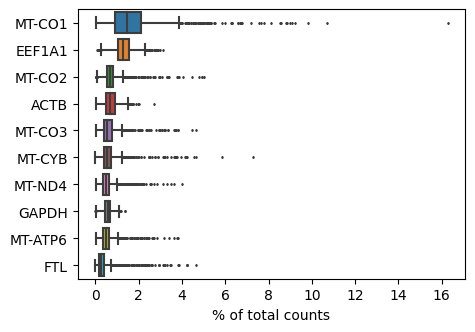

In [41]:
sc.pl.highest_expr_genes(adata, n_top=10, )

In [42]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

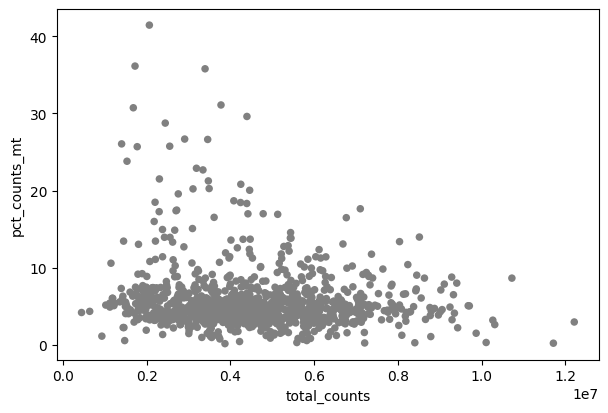

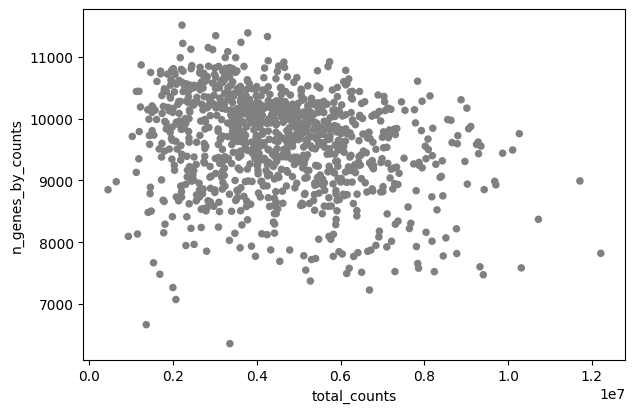

In [43]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [44]:
adata.raw = adata

In [45]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Chu/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Chu/processed')

adata.write('D:/MyData/scEDGE_Generation/data/Chu/processed/Chu.h5ad')

In [46]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var 

In [47]:
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/Chu/processed/chu_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/Chu/processed/chu_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Chu/processed/chu_expression_matrix.mtx', expression_matrix)

## Top2000

In [48]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

D:\Anaconda3\envs\PyTorch\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [49]:
adata_top = adata[:, adata.var.highly_variable]

In [50]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Chu_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Chu_top2000/processed')

adata_top.write('D:/MyData/scEDGE_Generation/data/Chu_top2000/processed/Chu_top2000.h5ad')

In [51]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [52]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Chu_top2000/processed/chu_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Chu_top2000/processed/chu_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Chu_top2000/processed/chu_expression_matrix_top2000.mtx', expression_matrix_top)